In [190]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
import matplotlib.cm as cm
import scipy as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [191]:
df = pd.read_csv('bank_marketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,season,week_part,campaign,deposit,train
0,2,1,1,4,0,1,0,1,2,2,1,0,0
1,3,2,2,5,0,0,0,2,2,2,1,0,0
2,1,2,1,5,0,1,0,2,3,1,1,0,0
3,3,3,1,7,0,1,0,1,1,1,1,0,1
4,2,2,2,7,0,0,0,1,4,2,1,0,1


In [192]:
# # Making sure the last column will hold the labels
# data = df.dropna(axis=1)
# X, y = data.drop('class', axis=1), data['class']
# X = np.column_stack([X,y])
# # split dataset using random_state to get the same split each time
# X_train, X_test = train_test_split(X, random_state=99)
X_train, X_test = df[df['train'] == 1], df[df['train'] == 0]
X_train.shape[0], X_test.shape[0]

(2163, 927)

In [193]:
X_test.shape[1]-1

12

7. Predictors are 0-11

8. Label is feature 12

In [194]:
X_train = np.delete(X_train, 12, axis=1)
X_test = np.delete(X_test, 12, axis=1)
np.savetxt("foo.csv", X_train, delimiter=",")
X_train.shape[1],X_test.shape[1]

(12, 12)

In [196]:
X_train, y_train = X_train[:, 0:11], X_train[:, 11]
np.savetxt("foo2.csv", y_train, delimiter=",")
X_train, y_train

(array([[3, 3, 1, ..., 1, 1, 1],
        [2, 2, 2, ..., 4, 2, 1],
        [2, 3, 2, ..., 4, 1, 1],
        ...,
        [3, 3, 1, ..., 3, 2, 1],
        [2, 8, 2, ..., 2, 1, 1],
        [2, 7, 2, ..., 1, 1, 1]], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [199]:
clf = DecisionTreeClassifier(min_impurity_decrease=0.00065)
clf = clf.fit(X_train,y_train)

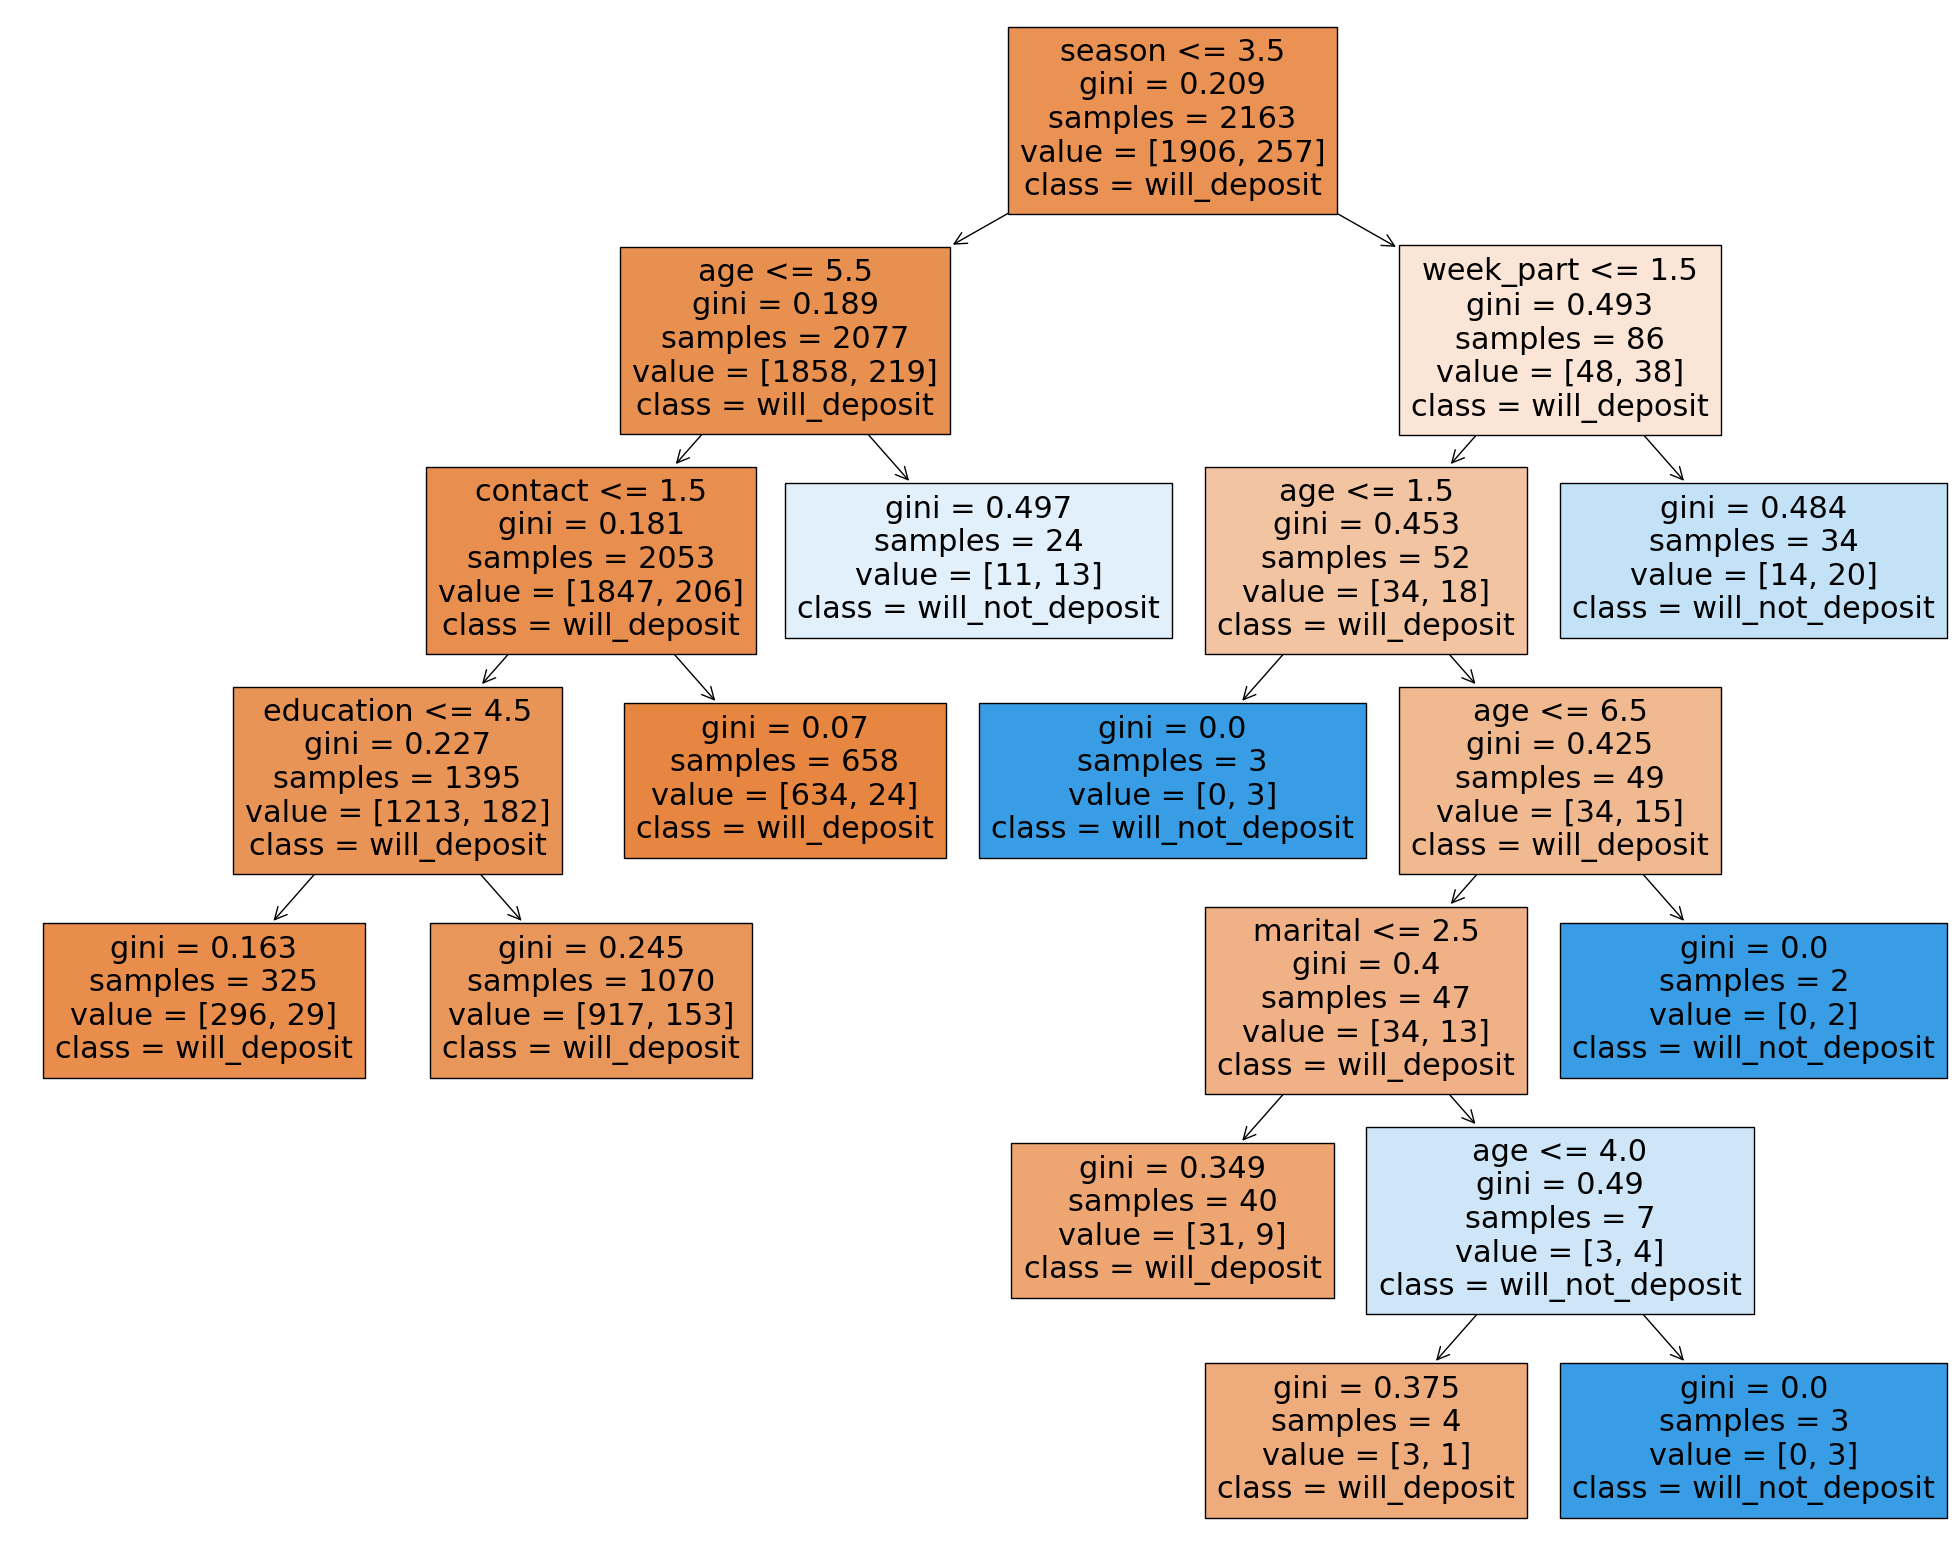

In [228]:
iris = list(df.columns.values)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris, class_names= ['will_deposit', 'will_not_deposit'], filled=True)
# iris
fig.savefig("decision_tree.png")


10. Some predicators didn't appear because they were not good as splitting features for the dataset, i.e. there was always a better feature to split the data according to (or the threshold was too low for all the features).

11. The Gini impurity is some measure (according to a specific formula) that ranges from 0 to 1, where 0 indicates pure node (all elements belong to the same class) and 1 indicates maximum impurity. 0.209 means that the root node quite heterogeneous and not pure. In some of the leaf nodes we have gini=0.0, 0.163, 0.07, etc, which means better purity.

12. Gini calculation for the root node:
node0 calc score: (1 - (1858/2077)^2 - (219/2077)^2) = (1 - (0.8945^2 + 0.1054^2)) = 1 - 0.8113 = 0.1886
node1 calc score: (1 - (48/86)^2 - (38/86)^2) = (1 - (0.3115^2 + 0.1952^2)) = 1 - 0.5067 = 0.4932
gini = node0 * 2077/2163 + node1 * 86/2163 = 0.1811 + 0.0196 = 0.20075 ~ 0.201

In [227]:
# from HWA3 import goodness_of_split
# combined_dataset = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1)
# gini, groups=goodness_of_split(combined_dataset, 8)
# gini, groups